First assignment in Data Mining course by Dr. Chen Hajaj. 
I chose to take a more descriptive analytics approach as opposed to a more predictive analysis with ML models and such. As part of the data analysis of the given dataset, the following code contains these sub-parts:


*   Pre-proccessing / cleaning
*   Visualizations
*   Two-way ANOVA 





In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import operator
import matplotlib.pyplot as plt
import sys
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Call Sample.csv')
# Dataset is now stored in a Pandas Dataframe

In [3]:
data.head()

,Site,Client,Supervisor,Agent,Week,Service Time,Quality Score
0,East,A,Brian,41,1,509.0,6.5
1,East,A,Brian,41,2,505.0,6.9
2,East,A,Brian,41,3,NaN,5.9
3,East,A,Brian,41,4,505.0,7.1
4,East,A,Brian,41,5,511.0,9.1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Site           240 non-null    object 
 1   Client         240 non-null    object 
 2   Supervisor     240 non-null    object 
 3   Agent          240 non-null    int64  
 4   Week           240 non-null    int64  
 5   Service Time   231 non-null    float64
 6   Quality Score  234 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 13.2+ KB


**Cleaning NAs** - imputing missing Service Time and Quality Score values by the mean of each agent

In [ ]:
data["Service Time"] = data.groupby("Agent").transform(lambda x: x.fillna(x.mean()))['Service Time']
data["Quality Score"] = data.groupby("Agent").transform(lambda x: x.fillna(x.mean()))['Quality Score']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Site           240 non-null    object 
 1   Client         240 non-null    object 
 2   Supervisor     240 non-null    object 
 3   Agent          240 non-null    int64  
 4   Week           240 non-null    int64  
 5   Service Time   240 non-null    float64
 6   Quality Score  240 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 13.2+ KB


There are instances where the supervisor's name appears in different format - lower case, upper case, or spelled differently. In this next section I solve this.  

In [ ]:
data['Supervisor'] = data["Supervisor"].str.lower()


In [ ]:
data['Supervisor'].value_counts()

brian        20
george       20
kathy        20
eric         20
samantha     20
david        20
julie        20
michael      20
jorge        19
sarah        19
john         19
andrew       19
jorrge        1
sara          1
johnathan     1
adreew        1
Name: Supervisor, dtype: int64

In [ ]:
data["Supervisor"] = data["Supervisor"].replace(["jorrge","sara","johnathan","adreew"], ["jorge","sarah","john","andrew"])


In [ ]:
data["Supervisor"]= data["Supervisor"].str.capitalize()
data["Supervisor"].value_counts()

Brian       20
Jorge       20
George      20
Sarah       20
John        20
Kathy       20
Eric        20
Samantha    20
Andrew      20
David       20
Julie       20
Michael     20
Name: Supervisor, dtype: int64

Correlation check between Service Time and Quality Score:

In [ ]:
data['Service Time'].corr(data['Quality Score'])

-0.016840576757146914

In [ ]:
def corr_mat(X):
    f = plt.figure(figsize=(19, 15))
    plt.matshow(X.corr(),fignum=f.number)
    plt.xticks(range(X.select_dtypes(['number']).shape[1]), X.select_dtypes(['number']).columns, fontsize=14, rotation=45)
    plt.yticks(range(X.select_dtypes(['number']).shape[1]), X.select_dtypes(['number']).columns, fontsize=14)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title('Correlation Matrix', fontsize=16);
    plt.show()

Correlation Matrix - note that highest correlation (~0.5) is between Week and Quality Score features. Can be explained by the increase in score over time. 

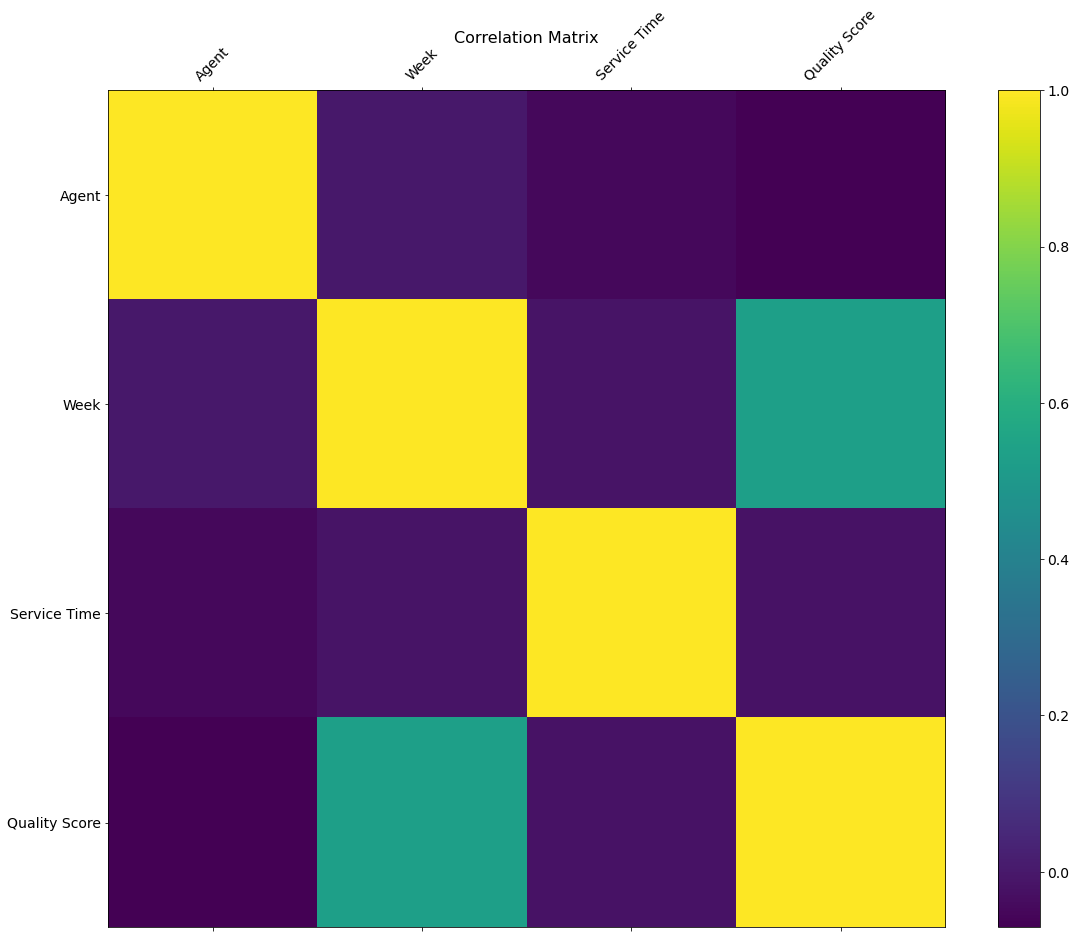

In [ ]:
corr_mat(data)

Highest correlation:

In [ ]:
data['Week'].corr(data['Quality Score'])

0.5354856923447464

In [ ]:
agent_individual_score_df = data.groupby(['Agent'])['Quality Score'].mean().reset_index().sort_values(by='Quality Score', ascending=False)
agent_individual_score_df = agent_individual_score_df.set_index("Agent")
top_5 = agent_individual_score_df.reset_index().head()
top_5['Agent'] = top_5['Agent'].apply(str)
top_5


,Agent,Quality Score
0,25,8.30
1,1,8.24
2,35,7.98
3,26,7.90
4,11,7.88


In [ ]:
agent_individual_score_df_ST = data.groupby(['Agent'])['Service Time'].mean().reset_index().sort_values(by='Service Time', ascending=True)
agent_individual_score_df_ST = agent_individual_score_df_ST.set_index("Agent")
top_5_ST = agent_individual_score_df_ST.reset_index().head()
top_5_ST['Agent'] = top_5_ST['Agent'].apply(str)
top_5_ST


,Agent,Service Time
0,22,404.2
1,46,406.6
2,21,406.8
3,48,408.0
4,47,409.6


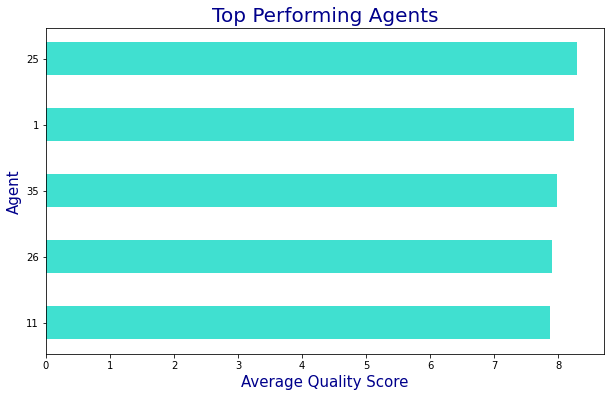

In [ ]:
plt.figure(figsize=(10,6))
plt.barh(top_5["Agent"],top_5["Quality Score"],height=0.5,color = "turquoise")
plt.xticks(rotation=0)
plt.ylabel("Agent",size=15,color="darkblue")
plt.xlabel("Average Quality Score",size=15,color="darkblue")
plt.title("Top Performing Agents",fontsize=20,color="darkblue")
plt.grid(False)
plt.gca().invert_yaxis()
plt.show()


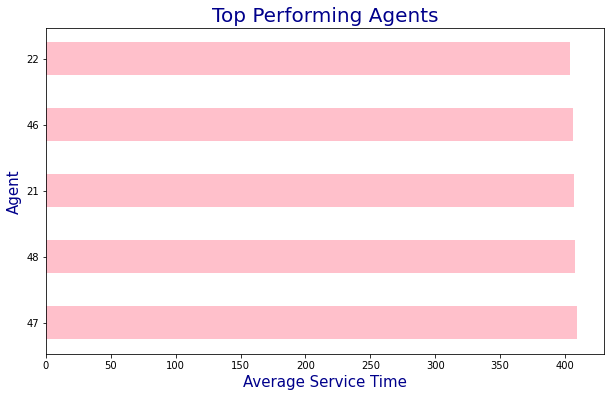

In [ ]:
plt.figure(figsize=(10,6))
plt.barh(top_5_ST["Agent"],top_5_ST["Service Time"],height=0.5,color = "pink")
plt.xticks(rotation=0)
plt.ylabel("Agent",size=15,color="darkblue")
plt.xlabel("Average Service Time",size=15,color="darkblue")
plt.title("Top Performing Agents",fontsize=20,color="darkblue")
plt.grid(False)
plt.gca().invert_yaxis()
plt.show()


In [ ]:
data.groupby(['Week'])['Quality Score'].mean().reset_index()

,Week,Quality Score
0,1,6.296875
1,2,6.039583
2,3,6.789583
3,4,7.494792
4,5,7.855729


In [ ]:
data.groupby(['Week'])['Service Time'].mean().reset_index()

,Week,Service Time
0,1,476.463542
1,2,476.432292
2,3,475.031250
3,4,474.817708
4,5,474.958333


In [ ]:
east = data[data["Site"]=="East"].groupby(['Week'])['Quality Score'].mean().reset_index().rename(columns={'Quality Score': 'Quality Score East'})
north = data[data["Site"]=="North"].groupby(['Week'])['Quality Score'].mean().reset_index().rename(columns={'Quality Score': 'Quality Score North'})
south = data[data["Site"]=="South"].groupby(['Week'])['Quality Score'].mean().reset_index().rename(columns={'Quality Score': 'Quality Score South'})

In [ ]:
Sites = pd.concat([east, north["Quality Score North"], south["Quality Score South"]], axis=1)
Sites

,Week,Quality Score East,Quality Score North,Quality Score South
0,1,6.403125,6.293750,6.193750
1,2,6.143750,6.231250,5.743750
2,3,6.593750,6.937500,6.837500
3,4,7.623437,7.768750,7.092187
4,5,7.987500,7.954688,7.625000


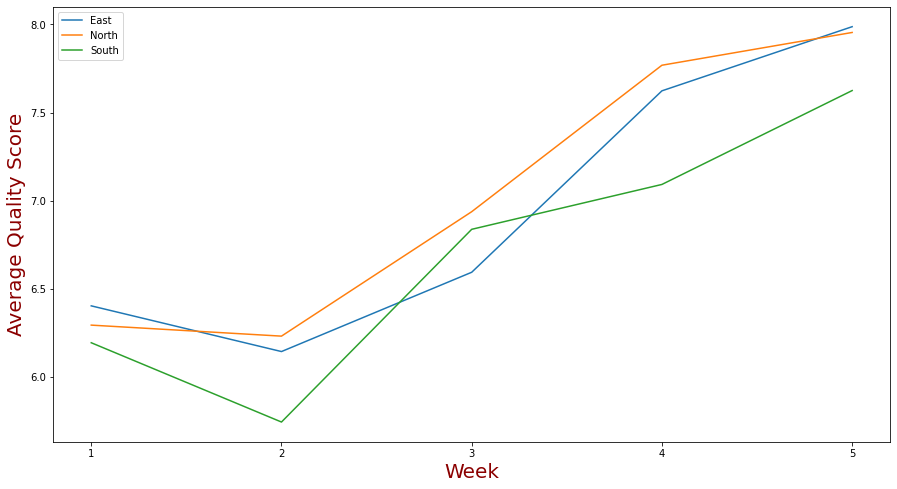

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(Sites['Week'],Sites["Quality Score East"],label='East')
plt.plot(Sites['Week'],Sites["Quality Score North"],label = 'North')
plt.plot(Sites['Week'],Sites["Quality Score South"],label = "South")
plt.locator_params(axis="x", nbins=5)
plt.legend()
plt.xlabel("Week",size="20",color="darkred")
plt.ylabel("Average Quality Score",size="20",color="darkred")
plt.grid(False)
plt.show()

In [ ]:
east = data[data["Site"]=="East"].groupby(['Week'])['Service Time'].mean().reset_index().rename(columns={'Service Time': 'Service Time East'})
north = data[data["Site"]=="North"].groupby(['Week'])['Service Time'].mean().reset_index().rename(columns={'Service Time': 'Service Time North'})
south = data[data["Site"]=="South"].groupby(['Week'])['Service Time'].mean().reset_index().rename(columns={'Service Time': 'Service Time South'})

In [ ]:
Sites = pd.concat([east, north["Service Time North"], south["Service Time South"]], axis=1)
Sites

,Week,Service Time East,Service Time North,Service Time South
0,1,461.000000,456.625000,511.765625
1,2,461.000000,456.515625,511.781250
2,3,461.156250,453.375000,510.562500
3,4,461.015625,452.312500,511.125000
4,5,460.562500,453.125000,511.187500


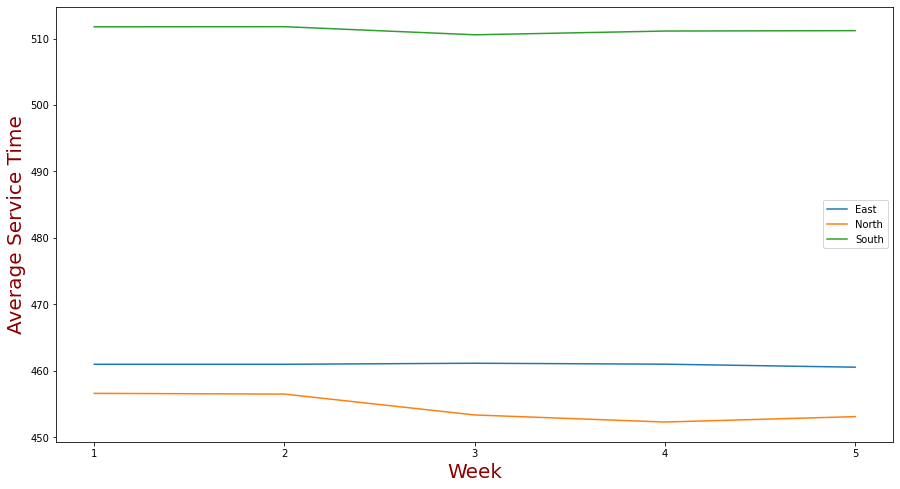

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(Sites['Week'],Sites["Service Time East"],label='East')
plt.plot(Sites['Week'],Sites["Service Time North"],label = 'North')
plt.plot(Sites['Week'],Sites["Service Time South"],label = "South")
plt.locator_params(axis="x", nbins=5)
plt.legend()
plt.xlabel("Week",size="20",color="darkred")
plt.ylabel("Average Service Time",size="20",color="darkred")
plt.grid(False)
plt.show()

The north site has the best performance overall with the lowest ST and highest QS

In [ ]:
data.groupby(['Supervisor'])['Quality Score'].mean().reset_index()

,Supervisor,Quality Score
0,Andrew,7.41500
1,Brian,7.18875
2,David,7.38500
3,Eric,6.35500
4,George,6.71000
5,John,7.60625
6,Jorge,7.12500
7,Julie,6.04500
8,Kathy,7.75000
9,Michael,5.94875


In [ ]:
data.groupby(['Supervisor'])['Service Time'].mean().reset_index()

,Supervisor,Service Time
0,Andrew,517.2625
1,Brian,512.9750
2,David,507.8500
3,Eric,455.1125
4,George,408.9000
5,John,454.3500
6,Jorge,513.4125
7,Julie,511.2000
8,Kathy,453.5000
9,Michael,508.8250


In [ ]:
week1 = data[data["Week"]==1].groupby(['Supervisor'])['Service Time'].mean().reset_index().rename(columns={'Service Time': 'Service Time Week 1'}).sort_values(by='Service Time Week 1', ascending=True).head(3)
week2 = data[data["Week"]==2].groupby(['Supervisor'])['Service Time'].mean().reset_index().rename(columns={'Service Time': 'Service Time Week 2'}).sort_values(by='Service Time Week 2', ascending=True).head(3)
week3 = data[data["Week"]==3].groupby(['Supervisor'])['Service Time'].mean().reset_index().rename(columns={'Service Time': 'Service Time Week 3'}).sort_values(by='Service Time Week 3', ascending=True).head(3)
week4 = data[data["Week"]==4].groupby(['Supervisor'])['Service Time'].mean().reset_index().rename(columns={'Service Time': 'Service Time Week 4'}).sort_values(by='Service Time Week 4', ascending=True).head(3)
week5 = data[data["Week"]==5].groupby(['Supervisor'])['Service Time'].mean().reset_index().rename(columns={'Service Time': 'Service Time Week 5'}).sort_values(by='Service Time Week 5', ascending=True).head(3)


In [ ]:
week1

,Supervisor,Service Time Week 1
4,George,409.00
11,Sarah,409.25
3,Eric,452.75


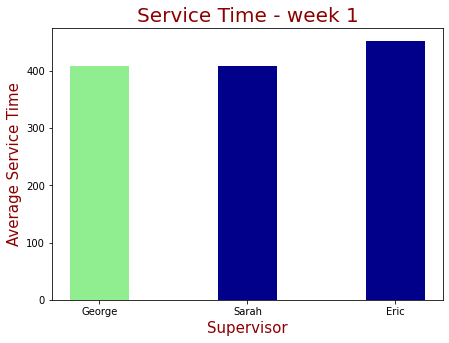

In [ ]:
plt.figure(figsize=(7,5))
width = 0.4
colors = ["darkblue" if i != week1['Service Time Week 1'].min() else "lightgreen" for i in week1['Service Time Week 1']]
plt.bar(week1["Supervisor"],week1["Service Time Week 1"],width,color = colors)
plt.xticks(rotation=0)
plt.xlabel("Supervisor",size=15,color="darkred")
plt.ylabel("Average Service Time",size=15,color="darkred")
plt.title("Service Time - week 1",fontsize=20,color="darkred")
plt.show()

In [ ]:
week5

,Supervisor,Service Time Week 5
11,Sarah,406.50
4,George,408.75
10,Samantha,449.00


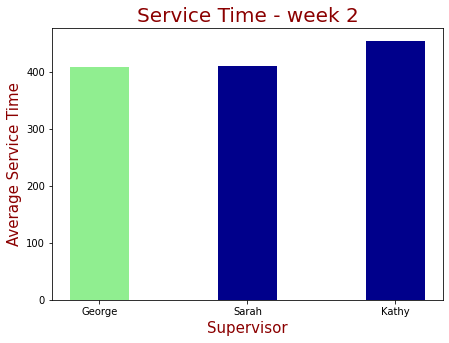

In [ ]:
plt.figure(figsize=(7,5))
width = 0.4
colors = ["darkblue" if i != week2['Service Time Week 2'].min() else "lightgreen" for i in week2['Service Time Week 2']]
plt.bar(week2["Supervisor"],week2["Service Time Week 2"],width,color = colors)
plt.xticks(rotation=0)
plt.xlabel("Supervisor",size=15,color="darkred")
plt.ylabel("Average Service Time",size=15,color="darkred")
plt.title("Service Time - week 2",fontsize=20,color="darkred")
plt.show()

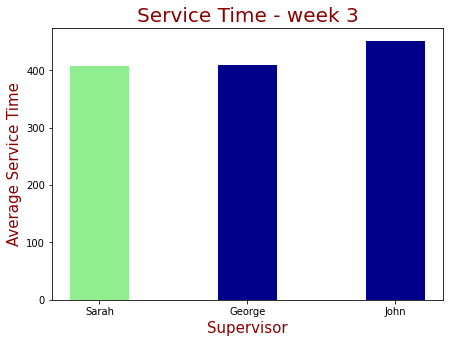

In [ ]:
plt.figure(figsize=(7,5))
width = 0.4
colors = ["darkblue" if i != week3['Service Time Week 3'].min() else "lightgreen" for i in week3['Service Time Week 3']]
plt.bar(week3["Supervisor"],week3["Service Time Week 3"],width,color = colors)
plt.xticks(rotation=0)
plt.xlabel("Supervisor",size=15,color="darkred")
plt.ylabel("Average Service Time",size=15,color="darkred")
plt.title("Service Time - week 3",fontsize=20,color="darkred")
plt.show()

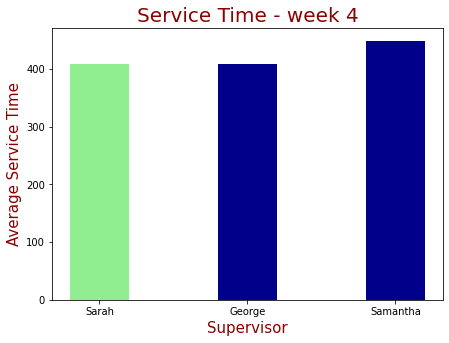

In [ ]:
plt.figure(figsize=(7,5))
width = 0.4
colors = ["darkblue" if i != week4['Service Time Week 4'].min() else "lightgreen" for i in week4['Service Time Week 4']]
plt.bar(week4["Supervisor"],week4["Service Time Week 4"],width,color = colors)
plt.xticks(rotation=0)
plt.xlabel("Supervisor",size=15,color="darkred")
plt.ylabel("Average Service Time",size=15,color="darkred")
plt.title("Service Time - week 4",fontsize=20,color="darkred")
plt.show()

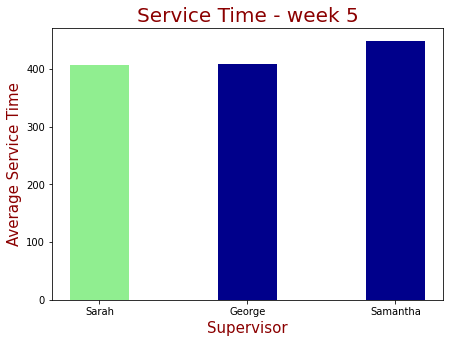

In [ ]:
plt.figure(figsize=(7,5))
width = 0.4
colors = ["darkblue" if i != week5['Service Time Week 5'].min() else "lightgreen" for i in week5['Service Time Week 5']]
plt.bar(week5["Supervisor"],week5["Service Time Week 5"],width,color = colors)
plt.xticks(rotation=0)
plt.xlabel("Supervisor",size=15,color="darkred")
plt.ylabel("Average Service Time",size=15,color="darkred")
plt.title("Service Time - week 5",fontsize=20,color="darkred")
plt.show()

In [ ]:
data.groupby(['Supervisor'])['Quality Score'].mean().reset_index()

,Supervisor,Quality Score
0,Andrew,7.41500
1,Brian,7.18875
2,David,7.38500
3,Eric,6.35500
4,George,6.71000
5,John,7.60625
6,Jorge,7.12500
7,Julie,6.04500
8,Kathy,7.75000
9,Michael,5.94875


In [ ]:
week1 = data[data["Week"]==1].groupby(['Supervisor'])['Quality Score'].mean().reset_index().rename(columns={'Quality Score': 'Quality Score Week 1'}).sort_values(by='Quality Score Week 1', ascending=False).head(3)
week2 = data[data["Week"]==2].groupby(['Supervisor'])['Quality Score'].mean().reset_index().rename(columns={'Quality Score': 'Quality Score Week 2'}).sort_values(by='Quality Score Week 2', ascending=False).head(3)
week3 = data[data["Week"]==3].groupby(['Supervisor'])['Quality Score'].mean().reset_index().rename(columns={'Quality Score': 'Quality Score Week 3'}).sort_values(by='Quality Score Week 3', ascending=False).head(3)
week4 = data[data["Week"]==4].groupby(['Supervisor'])['Quality Score'].mean().reset_index().rename(columns={'Quality Score': 'Quality Score Week 4'}).sort_values(by='Quality Score Week 4', ascending=False).head(3)
week5 = data[data["Week"]==5].groupby(['Supervisor'])['Quality Score'].mean().reset_index().rename(columns={'Quality Score': 'Quality Score Week 5'}).sort_values(by='Quality Score Week 5', ascending=False).head(3)


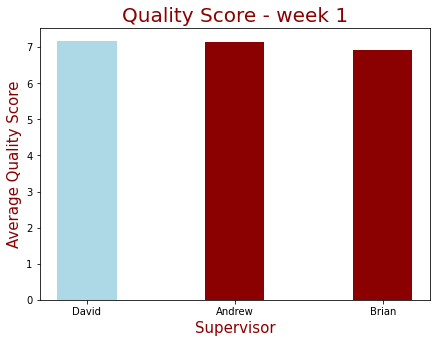

In [ ]:
plt.figure(figsize=(7,5))
width = 0.4
colors = ["darkred" if i != week1['Quality Score Week 1'].max() else "lightblue" for i in week1['Quality Score Week 1']]
plt.bar(week1["Supervisor"],week1["Quality Score Week 1"],width,color = colors)
plt.xticks(rotation=0)
plt.xlabel("Supervisor",size=15,color="darkred")
plt.ylabel("Average Quality Score",size=15,color="darkred")
plt.title("Quality Score - week 1",fontsize=20,color="darkred")
plt.grid(False)

plt.show()

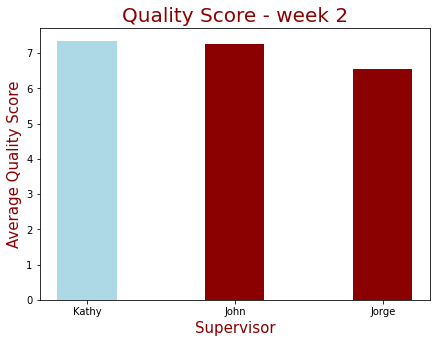

In [ ]:
plt.figure(figsize=(7,5))
width = 0.4
colors = ["darkred" if i != week2['Quality Score Week 2'].max() else "lightblue" for i in week2['Quality Score Week 2']]
plt.bar(week2["Supervisor"],week2["Quality Score Week 2"],width,color = colors)
plt.xticks(rotation=0)
plt.xlabel("Supervisor",size=15,color="darkred")
plt.ylabel("Average Quality Score",size=15,color="darkred")
plt.title("Quality Score - week 2",fontsize=20,color="darkred")
plt.grid(False)
plt.show()

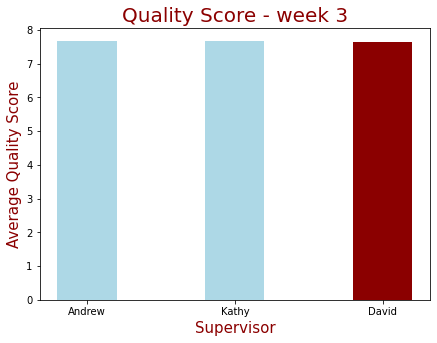

In [ ]:
plt.figure(figsize=(7,5))
width = 0.4
colors = ["darkred" if i != week3['Quality Score Week 3'].max() else "lightblue" for i in week3['Quality Score Week 3']]
plt.bar(week3["Supervisor"],week3["Quality Score Week 3"],width,color = colors)
plt.xticks(rotation=0)
plt.xlabel("Supervisor",size=15,color="darkred")
plt.ylabel("Average Quality Score",size=15,color="darkred")
plt.title("Quality Score - week 3",fontsize=20,color="darkred")
plt.grid(False)

plt.show()

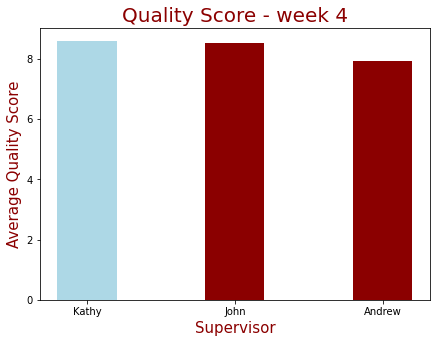

In [ ]:
plt.figure(figsize=(7,5))
width = 0.4
colors = ["darkred" if i != week4['Quality Score Week 4'].max() else "lightblue" for i in week4['Quality Score Week 4']]
plt.bar(week4["Supervisor"],week4["Quality Score Week 4"],width,color = colors)
plt.xticks(rotation=0)
plt.xlabel("Supervisor",size=15,color="darkred")
plt.ylabel("Average Quality Score",size=15,color="darkred")
plt.title("Quality Score - week 4",fontsize=20,color="darkred")
plt.grid(False)

plt.show()

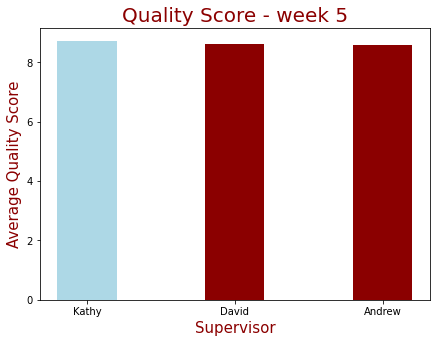

In [ ]:
plt.figure(figsize=(7,5))
width = 0.4
colors = ["darkred" if i != week5['Quality Score Week 5'].max() else "lightblue" for i in week5['Quality Score Week 5']]
plt.bar(week5["Supervisor"],week5["Quality Score Week 5"],width,color = colors)
plt.xticks(rotation=0)
plt.xlabel("Supervisor",size=15,color="darkred")
plt.ylabel("Average Quality Score",size=15,color="darkred")
plt.title("Quality Score - week 5",fontsize=20,color="darkred")
plt.grid(False)

plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.stats.anova import anova_lm
two_way_aov_QS = data[["Client","Site","Quality Score"]]
two_way_aov_QS = two_way_aov_QS.rename(columns={'Quality Score': 'Quality_Score'})
QS=two_way_aov_QS['Quality_Score']
client = two_way_aov_QS['Client']
site = two_way_aov_QS['Site']

In [ ]:
two_way_aov_QS['Client'] = two_way_aov_QS['Client']
two_way_aov_QS['Site'] = two_way_aov_QS['Site']

Text(0.5, 0.98, 'Interaction - Client & Site - Quality Score')

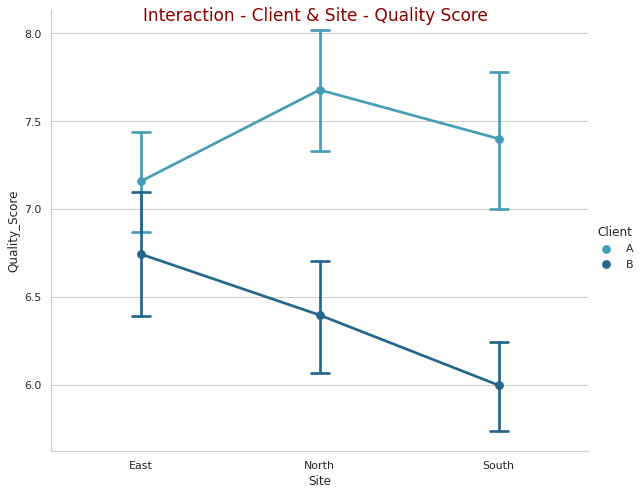

In [ ]:
sns.set_theme(style="whitegrid")
g = sns.catplot(x="Site", y="Quality_Score", hue="Client",
                capsize=0.1, palette="YlGnBu_d", height=7, aspect=1.2,
                kind="point", data=two_way_aov_QS)
g.fig.suptitle('Interaction - Client & Site - Quality Score',fontsize=17,color="darkred")

In [ ]:
model = ols('Quality_Score ~ Site + Client + Site:Client', data=two_way_aov_QS).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Site,4.953063,2.0,2.150741,1.186933e-01
Client,63.989190,1.0,55.571358,1.740753e-12
Site:Client,11.663521,2.0,5.064587,7.026716e-03
Residual,269.445828,234.0,NaN,NaN


In [ ]:
two_way_aov_ST = data[["Client","Site","Service Time"]]
two_way_aov_ST = two_way_aov_ST.rename(columns={'Service Time': 'Service_Time'})
ST=two_way_aov_ST['Service_Time']
two_way_aov_ST['Client'] = two_way_aov_ST['Client']
two_way_aov_ST['Site'] = two_way_aov_ST['Site']
client = two_way_aov_ST['Client']
site = two_way_aov_ST['Site']

Text(0.5, 0.98, 'Interaction - Client & Site - Service Time ')

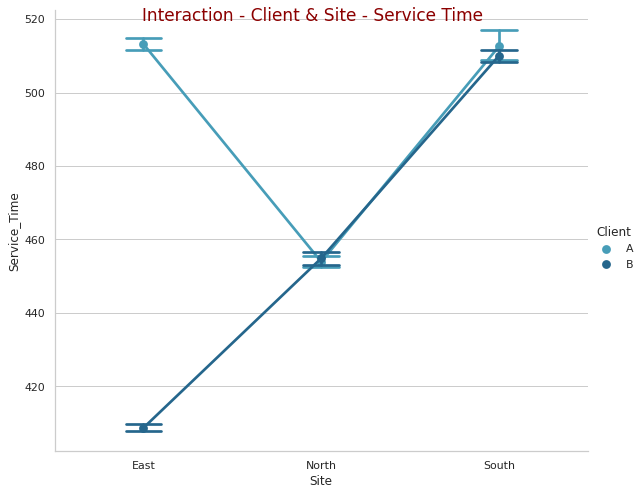

In [ ]:
sns.set_theme(style="whitegrid")
g = sns.catplot(x="Site", y="Service_Time", hue="Client",
                capsize=.2, palette="YlGnBu_d", height=7, aspect=1.2,
                kind="point", data=two_way_aov_ST)
g.fig.suptitle('Interaction - Client & Site - Service Time ',fontsize=17,color="darkred")

In [ ]:
model = ols('Service_Time ~ Site + Client + Site:Client', data=two_way_aov_ST).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Site,155033.256250,2.0,1605.403165,2.238579e-137
Client,75056.908594,1.0,1554.461301,2.542083e-105
Site:Client,143468.725000,2.0,1485.649923,1.027121e-133
Residual,11298.651562,234.0,NaN,NaN
